In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
import os

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import img_to_array, load_img

import random
import os
os.getcwd()

import cv2
import numpy as np
import imutils

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
saree_path = '/content/drive/My Drive/Webscraping_classification/train/sarees'
jeans_path = '/content/drive/My Drive/Webscraping_classification/train/Jeans'
trouser_path = '/content/drive/My Drive/Webscraping_classification/train/Trousers'

print('Total training saree images:', len(os.listdir(saree_path)))
print('Total training Jeans images:', len(os.listdir(jeans_path)))
print('Total training Trouser images:', len(os.listdir(trouser_path)))

saree_name = [os.path.join(saree_path, f) for f in os.listdir(saree_path) if os.path.isfile(os.path.join(saree_path, f))]
Jeans_name = [os.path.join(jeans_path, f) for f in os.listdir(jeans_path) if os.path.isfile(os.path.join(jeans_path, f))]
Trouser_name = [os.path.join(trouser_path, f) for f in os.listdir(trouser_path) if os.path.isfile(os.path.join(trouser_path, f))]

Total training saree images: 701
Total training Jeans images: 701
Total training Trouser images: 701


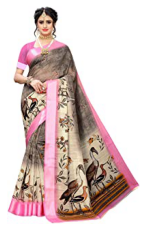

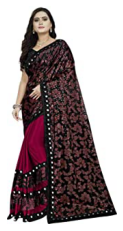

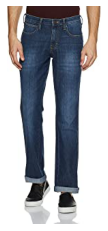

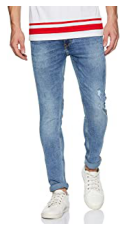

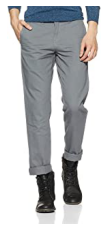

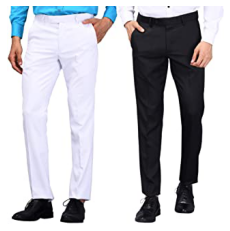

In [ ]:
pic_index = 2

next_saree= [os.path.join(saree_path, fname) 
                for fname in saree_name[pic_index-2:pic_index]]
next_Jeans = [os.path.join(jeans_path, fname) 
                for fname in Jeans_name[pic_index-2:pic_index]]
next_Trousers = [os.path.join(trouser_path, fname) 
                for fname in Trouser_name[pic_index-2:pic_index]]

for i, img_path in enumerate(next_saree+next_Jeans+next_Trousers):
    img = mpimg.imread(img_path)
    plt.imshow(img)
    plt.axis('Off')
    plt.show()

In [ ]:
#creating a list of location
saree = '/content/drive/My Drive/Webscraping_classification/train/sarees/*.jpeg'
jeans = '/content/drive/My Drive/Webscraping_classification/train/Jeans/*.jpeg'
trouser = '/content/drive/My Drive/Webscraping_classification/train/Trousers/*.jpeg'
file_loc = [saree,jeans,trouser]

In [ ]:
saree_path = '/content/drive/My Drive/Webscraping_classification/train/sarees/'
jeans_path = '/content/drive/My Drive/Webscraping_classification/train/Jeans/'
trouser_path = '/content/drive/My Drive/Webscraping_classification/train/Trousers/'

print('Total training saree images:', len(os.listdir(saree_path)))
print('Total training Jeans images:', len(os.listdir(jeans_path)))
print('Total training Trouser images:', len(os.listdir(trouser_path)))

saree_name = [os.path.join(saree_path, f) for f in os.listdir(saree_path) if os.path.isfile(os.path.join(saree_path, f))]
Jeans_name = [os.path.join(jeans_path, f) for f in os.listdir(jeans_path) if os.path.isfile(os.path.join(jeans_path, f))]
Trouser_name = [os.path.join(trouser_path, f) for f in os.listdir(trouser_path) if os.path.isfile(os.path.join(trouser_path, f))]

Total training saree images: 701
Total training Jeans images: 701
Total training Trouser images: 701


In [ ]:
batch_size = 25
TRAINING_DIR = "/content/drive/My Drive/Webscraping_classification/train/"

training_datagen = ImageDataGenerator(
    rescale = 1./255)

VALIDATION_DIR = "/content/drive/My Drive/Webscraping_classification/test/"

validation_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = training_datagen.flow_from_directory(
    TRAINING_DIR,
    target_size=(150,150),
    batch_size=batch_size,
    class_mode='categorical')
  
validation_generator = validation_datagen.flow_from_directory(
    VALIDATION_DIR,
    target_size=(150,150),
    batch_size=batch_size,
    class_mode='categorical')


Found 2100 images belonging to 3 classes.
Found 72 images belonging to 3 classes.


In [ ]:
print(train_generator.class_indices)

{'Jeans': 0, 'Trousers': 1, 'sarees': 2}


In [ ]:
import os
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import SGD,RMSprop,Adam,Nadam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

In [ ]:
def cnnmodel():
  model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 150x150 with 3 bytes color
    # This is the first convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # fifth convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
    ])
  return model

In [ ]:
model = cnnmodel()
model.summary()

Model: "sequential_38"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_154 (Conv2D)          (None, 148, 148, 64)      1792      
_________________________________________________________________
max_pooling2d_154 (MaxPoolin (None, 74, 74, 64)        0         
_________________________________________________________________
conv2d_155 (Conv2D)          (None, 72, 72, 64)        36928     
_________________________________________________________________
max_pooling2d_155 (MaxPoolin (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_156 (Conv2D)          (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_156 (MaxPoolin (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_157 (Conv2D)          (None, 15, 15, 128)     

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
def callbacks():
    checkpoint = ModelCheckpoint('save.h5',
                             monitor='val_accuracy',
                             verbose=1,
                             save_best_only=True,
                             mode='max')
    earlystopping = EarlyStopping(monitor='val_accuracy',
                              min_delta=0,
                              patience= 5,
                              verbose=1,
                              mode='max',
                              restore_best_weights=True)
    reduce_lr = ReduceLROnPlateau(monitor='val_accuracy',
                             factor=0.2,
                             patience=10,
                             verbose=1,
                             mode='max',
                             min_delta=0.0001)

    callbacks = [checkpoint,earlystopping,reduce_lr]
    return callbacks

In [ ]:
#SGD with Momentum

#instantiate callbacks
callbacks = callbacks()

SGDm = SGD(learning_rate=0.01, momentum=0.01,nesterov=False)


#instantiate model
model_SGDm = cnnmodel()

#Compile the model
model_SGDm.compile(optimizer=SGDm,
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=['accuracy'])

#Train the model
SGDm_mod = model_SGDm.fit_generator(
    train_generator,
    epochs=20,
    validation_data=validation_generator,
    callbacks =callbacks
)

Epoch 1/20
84/84 [==============================] - ETA: 0s - loss: 1.0912 - accuracy: 0.4071
Epoch 00001: val_accuracy improved from -inf to 0.68056, saving model to save.h5
84/84 [==============================] - 6s 70ms/step - loss: 1.0912 - accuracy: 0.4071 - val_loss: 1.0698 - val_accuracy: 0.6806 - lr: 0.0100
Epoch 2/20
84/84 [==============================] - ETA: 0s - loss: 1.0521 - accuracy: 0.5129
Epoch 00002: val_accuracy did not improve from 0.68056
84/84 [==============================] - 6s 72ms/step - loss: 1.0521 - accuracy: 0.5129 - val_loss: 0.9876 - val_accuracy: 0.4306 - lr: 0.0100
Epoch 3/20
84/84 [==============================] - ETA: 0s - loss: 0.9481 - accuracy: 0.5314
Epoch 00003: val_accuracy did not improve from 0.68056
84/84 [==============================] - 6s 68ms/step - loss: 0.9481 - accuracy: 0.5314 - val_loss: 0.7341 - val_accuracy: 0.6250 - lr: 0.0100
Epoch 4/20
84/84 [==============================] - ETA: 0s - loss: 0.7778 - accuracy: 0.5990
Epoc

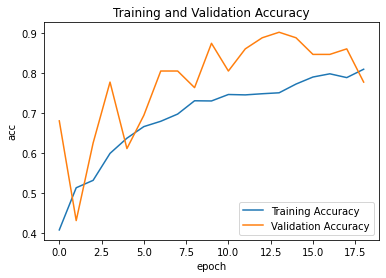

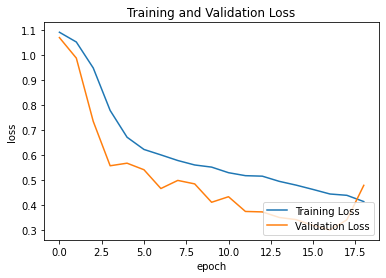

In [ ]:
#Visualize training results
acc = plt.plot(SGDm_mod.history['accuracy'])
val_acc = plt.plot(SGDm_mod.history['val_accuracy'])
plt.title('Training and Validation Accuracy')
plt.ylabel('acc')
plt.xlabel('epoch')
plt.legend(['Training Accuracy', 'Validation Accuracy'], loc='lower right')
plt.show()

loss= plt.plot(SGDm_mod.history['loss'])
val_loss=plt.plot(SGDm_mod.history['val_loss'])
plt.title('Training and Validation Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Training Loss', 'Validation Loss'], loc='lower right')
plt.show()

In [ ]:
#Nesterov Accelerated Gradient Descent

NESTROV= SGD(learning_rate=0.01, momentum=0.01, nesterov= True)

#instantiate model
model_NESTROV = cnnmodel()


#Compile the model
model_NESTROV.compile(optimizer=NESTROV,
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=['accuracy'])

#Train the model
NESTROV_mod = model_NESTROV.fit_generator(
    train_generator,
    epochs=20,
    validation_data=validation_generator,
    callbacks =callbacks
)

Epoch 1/20
84/84 [==============================] - ETA: 0s - loss: 1.0854 - accuracy: 0.4167
Epoch 00001: val_accuracy did not improve from 0.90278
84/84 [==============================] - 7s 80ms/step - loss: 1.0854 - accuracy: 0.4167 - val_loss: 1.0481 - val_accuracy: 0.6528 - lr: 0.0100
Epoch 2/20
84/84 [==============================] - ETA: 0s - loss: 1.0008 - accuracy: 0.5295
Epoch 00002: val_accuracy did not improve from 0.90278
84/84 [==============================] - 6s 71ms/step - loss: 1.0008 - accuracy: 0.5295 - val_loss: 0.8048 - val_accuracy: 0.6111 - lr: 0.0100
Epoch 3/20
84/84 [==============================] - ETA: 0s - loss: 0.8303 - accuracy: 0.5724
Epoch 00003: val_accuracy did not improve from 0.90278
84/84 [==============================] - 6s 71ms/step - loss: 0.8303 - accuracy: 0.5724 - val_loss: 0.6908 - val_accuracy: 0.5694 - lr: 0.0100
Epoch 4/20
84/84 [==============================] - ETA: 0s - loss: 0.7056 - accuracy: 0.6271
Epoch 00004: val_accuracy did 

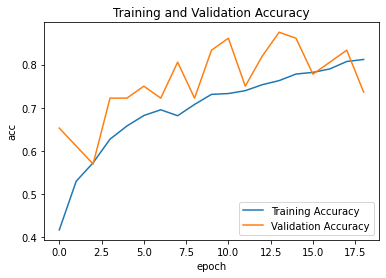

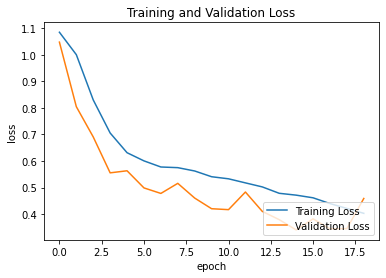

In [ ]:
#Visualize training results
acc = plt.plot(NESTROV_mod.history['accuracy'])
val_acc = plt.plot(NESTROV_mod.history['val_accuracy'])
plt.title('Training and Validation Accuracy')
plt.ylabel('acc')
plt.xlabel('epoch')
plt.legend(['Training Accuracy', 'Validation Accuracy'], loc='lower right')
plt.show()

loss= plt.plot(NESTROV_mod.history['loss'])
val_loss=plt.plot(NESTROV_mod.history['val_loss'])
plt.title('Training and Validation Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Training Loss', 'Validation Loss'], loc='lower right')
plt.show()

In [ ]:
#RMSprop

RMS= RMSprop(learning_rate=0.01)

#instantiate model
model_RMS = cnnmodel()

#Compile the model
model_RMS.compile(optimizer=RMS,
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=['accuracy'])

#Train the model
RMS_mod = model_RMS.fit_generator(
    train_generator,
    epochs=20,
    validation_data=validation_generator,
    callbacks =callbacks
)

Epoch 1/20
84/84 [==============================] - ETA: 0s - loss: 201.1255 - accuracy: 0.3600
Epoch 00001: val_accuracy did not improve from 0.90278
84/84 [==============================] - 6s 73ms/step - loss: 201.1255 - accuracy: 0.3600 - val_loss: 1.0922 - val_accuracy: 0.3611 - lr: 0.0100
Epoch 2/20
84/84 [==============================] - ETA: 0s - loss: 1.1180 - accuracy: 0.3286
Epoch 00002: val_accuracy did not improve from 0.90278
84/84 [==============================] - 6s 71ms/step - loss: 1.1180 - accuracy: 0.3286 - val_loss: 1.0970 - val_accuracy: 0.3611 - lr: 0.0100
Epoch 3/20
84/84 [==============================] - ETA: 0s - loss: 1.1010 - accuracy: 0.3243
Epoch 00003: val_accuracy did not improve from 0.90278
84/84 [==============================] - 6s 71ms/step - loss: 1.1010 - accuracy: 0.3243 - val_loss: 1.1031 - val_accuracy: 0.2778 - lr: 0.0100
Epoch 4/20
84/84 [==============================] - ETA: 0s - loss: 1.0995 - accuracy: 0.3400
Epoch 00004: val_accuracy 

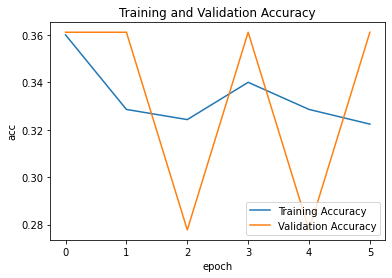

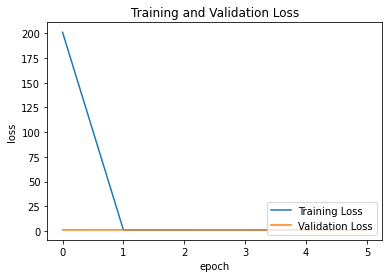

In [ ]:
#Visualize training results
acc = plt.plot(RMS_mod.history['accuracy'])
val_acc = plt.plot(RMS_mod.history['val_accuracy'])
plt.title('Training and Validation Accuracy')
plt.ylabel('acc')
plt.xlabel('epoch')
plt.legend(['Training Accuracy', 'Validation Accuracy'], loc='lower right')
plt.show()

loss= plt.plot(RMS_mod.history['loss'])
val_loss=plt.plot(RMS_mod.history['val_loss'])
plt.title('Training and Validation Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Training Loss', 'Validation Loss'], loc='lower right')
plt.show()


In [ ]:
#Reducing learning rate to 0.001

RMS= RMSprop(learning_rate=0.001)

#instantiate model
model_RMS = cnnmodel()

#Compile the model
model_RMS.compile(optimizer=RMS,
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=['accuracy'])

#Train the model
RMS_mod = model_RMS.fit_generator(
    train_generator,
    epochs=20,
    validation_data=validation_generator,
    callbacks =callbacks
)

Epoch 1/20
84/84 [==============================] - ETA: 0s - loss: 0.9238 - accuracy: 0.5248
Epoch 00001: val_accuracy did not improve from 0.90278
84/84 [==============================] - 6s 73ms/step - loss: 0.9238 - accuracy: 0.5248 - val_loss: 0.4979 - val_accuracy: 0.8056 - lr: 0.0010
Epoch 2/20
84/84 [==============================] - ETA: 0s - loss: 0.6293 - accuracy: 0.6852
Epoch 00002: val_accuracy did not improve from 0.90278
84/84 [==============================] - 6s 72ms/step - loss: 0.6293 - accuracy: 0.6852 - val_loss: 0.3945 - val_accuracy: 0.8750 - lr: 0.0010
Epoch 3/20
84/84 [==============================] - ETA: 0s - loss: 0.4919 - accuracy: 0.7771
Epoch 00003: val_accuracy did not improve from 0.90278
84/84 [==============================] - 6s 70ms/step - loss: 0.4919 - accuracy: 0.7771 - val_loss: 0.3484 - val_accuracy: 0.8611 - lr: 0.0010
Epoch 4/20
84/84 [==============================] - ETA: 0s - loss: 0.4448 - accuracy: 0.7962
Epoch 00004: val_accuracy did 

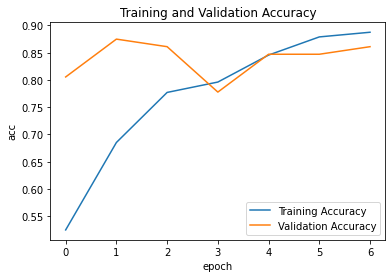

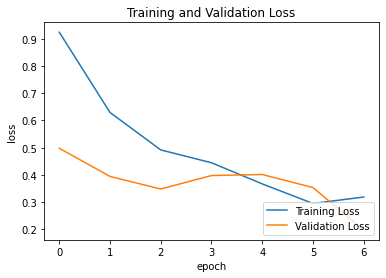

In [ ]:

#Visualize training results
acc = plt.plot(RMS_mod.history['accuracy'])
val_acc = plt.plot(RMS_mod.history['val_accuracy'])
plt.title('Training and Validation Accuracy')
plt.ylabel('acc')
plt.xlabel('epoch')
plt.legend(['Training Accuracy', 'Validation Accuracy'], loc='lower right')
plt.show()

loss= plt.plot(RMS_mod.history['loss'])
val_loss=plt.plot(RMS_mod.history['val_loss'])
plt.title('Training and Validation Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Training Loss', 'Validation Loss'], loc='lower right')
plt.show()

In [ ]:
#Adam

ADAM = Adam(learning_rate=0.01)

#instantiate model
model_ADAM = cnnmodel()

#Compile the model
model_ADAM.compile(optimizer=ADAM,
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=['accuracy'])

#Train the model
ADAM_mod = model_ADAM.fit_generator(
    train_generator,
    epochs=20,
    validation_data=validation_generator,
    callbacks =callbacks
)

Epoch 1/20
84/84 [==============================] - ETA: 0s - loss: 1.7607 - accuracy: 0.3467
Epoch 00001: val_accuracy did not improve from 0.90278
84/84 [==============================] - 6s 73ms/step - loss: 1.7607 - accuracy: 0.3467 - val_loss: 1.0993 - val_accuracy: 0.3611 - lr: 0.0100
Epoch 2/20
84/84 [==============================] - ETA: 0s - loss: 1.0998 - accuracy: 0.3276
Epoch 00002: val_accuracy did not improve from 0.90278
84/84 [==============================] - 6s 71ms/step - loss: 1.0998 - accuracy: 0.3276 - val_loss: 1.1021 - val_accuracy: 0.2778 - lr: 0.0100
Epoch 3/20
84/84 [==============================] - ETA: 0s - loss: 1.0996 - accuracy: 0.3248
Epoch 00003: val_accuracy did not improve from 0.90278
84/84 [==============================] - 6s 72ms/step - loss: 1.0996 - accuracy: 0.3248 - val_loss: 1.0969 - val_accuracy: 0.3611 - lr: 0.0100
Epoch 4/20
84/84 [==============================] - ETA: 0s - loss: 1.0999 - accuracy: 0.3305
Epoch 00004: val_accuracy did 

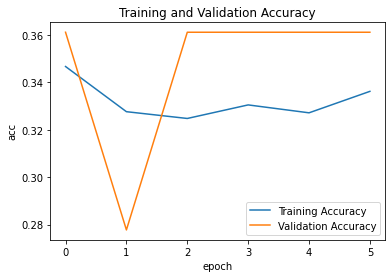

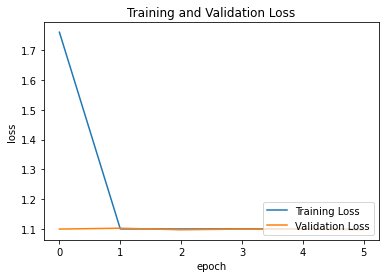

In [ ]:
#Visualize training results
acc = plt.plot(ADAM_mod.history['accuracy'])
val_acc = plt.plot(ADAM_mod.history['val_accuracy'])
plt.title('Training and Validation Accuracy')
plt.ylabel('acc')
plt.xlabel('epoch')
plt.legend(['Training Accuracy', 'Validation Accuracy'], loc='lower right')
plt.show()

loss= plt.plot(ADAM_mod.history['loss'])
val_loss=plt.plot(ADAM_mod.history['val_loss'])
plt.title('Training and Validation Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Training Loss', 'Validation Loss'], loc='lower right')
plt.show()


In [ ]:
#Adam  decreasing learning rate (0.001)

ADAM = Adam(learning_rate=0.001)

#instantiate model
model_ADAM = cnnmodel()

#Compile the model
model_ADAM.compile(optimizer=ADAM,
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=['accuracy'])

#Train the model
ADAM_mod = model_ADAM.fit_generator(
    train_generator,
    epochs=20,
    validation_data=validation_generator,
    callbacks =callbacks
)

Epoch 1/20
84/84 [==============================] - ETA: 0s - loss: 0.8086 - accuracy: 0.5952
Epoch 00001: val_accuracy did not improve from 0.90278
84/84 [==============================] - 6s 73ms/step - loss: 0.8086 - accuracy: 0.5952 - val_loss: 0.4579 - val_accuracy: 0.7778 - lr: 0.0010
Epoch 2/20
84/84 [==============================] - ETA: 0s - loss: 0.5202 - accuracy: 0.7586
Epoch 00002: val_accuracy did not improve from 0.90278
84/84 [==============================] - 6s 73ms/step - loss: 0.5202 - accuracy: 0.7586 - val_loss: 0.3097 - val_accuracy: 0.8611 - lr: 0.0010
Epoch 3/20
84/84 [==============================] - ETA: 0s - loss: 0.4139 - accuracy: 0.8162
Epoch 00003: val_accuracy did not improve from 0.90278
84/84 [==============================] - 6s 72ms/step - loss: 0.4139 - accuracy: 0.8162 - val_loss: 0.3901 - val_accuracy: 0.8333 - lr: 0.0010
Epoch 4/20
84/84 [==============================] - ETA: 0s - loss: 0.3825 - accuracy: 0.8195
Epoch 00004: val_accuracy impr

In [ ]:
#Nadam

NADAM = Nadam(learning_rate=0.01)

#instantiate model
model_NADAM = cnnmodel()

#Compile the model
model_NADAM.compile(optimizer=NADAM,
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=['accuracy'])

#Train the model
NADAM_mod = model_NADAM.fit_generator(
    train_generator,
    epochs=20,
    validation_data=validation_generator,
    callbacks =callbacks
)

Epoch 1/20
84/84 [==============================] - ETA: 0s - loss: 1.5092 - accuracy: 0.3129
Epoch 00001: val_accuracy did not improve from 0.97222
84/84 [==============================] - 6s 73ms/step - loss: 1.5092 - accuracy: 0.3129 - val_loss: 1.1028 - val_accuracy: 0.2778 - lr: 0.0100
Epoch 2/20
84/84 [==============================] - ETA: 0s - loss: 1.0999 - accuracy: 0.3371
Epoch 00002: val_accuracy did not improve from 0.97222
84/84 [==============================] - 6s 71ms/step - loss: 1.0999 - accuracy: 0.3371 - val_loss: 1.1004 - val_accuracy: 0.2778 - lr: 0.0100
Epoch 3/20
84/84 [==============================] - ETA: 0s - loss: 1.0998 - accuracy: 0.3143
Epoch 00003: val_accuracy did not improve from 0.97222
84/84 [==============================] - 6s 72ms/step - loss: 1.0998 - accuracy: 0.3143 - val_loss: 1.0977 - val_accuracy: 0.3611 - lr: 0.0100
Epoch 4/20
84/84 [==============================] - ETA: 0s - loss: 1.0996 - accuracy: 0.3219
Epoch 00004: val_accuracy did 

In [ ]:
#Nadam

NADAM = Nadam(learning_rate=0.001)

#instantiate model
model_NADAM = cnnmodel()

#Compile the model
model_NADAM.compile(optimizer=NADAM,
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=['accuracy'])

#Train the model
NADAM_mod = model_NADAM.fit_generator(
    train_generator,
    epochs=20,
    validation_data=validation_generator,
    callbacks =callbacks
)

Epoch 1/20
84/84 [==============================] - ETA: 0s - loss: 0.9778 - accuracy: 0.5095
Epoch 00001: val_accuracy did not improve from 0.97222
84/84 [==============================] - 6s 73ms/step - loss: 0.9778 - accuracy: 0.5095 - val_loss: 0.5801 - val_accuracy: 0.7222 - lr: 0.0010
Epoch 2/20
84/84 [==============================] - ETA: 0s - loss: 0.5897 - accuracy: 0.6995
Epoch 00002: val_accuracy did not improve from 0.97222
84/84 [==============================] - 6s 77ms/step - loss: 0.5897 - accuracy: 0.6995 - val_loss: 0.4102 - val_accuracy: 0.7917 - lr: 0.0010
Epoch 3/20
84/84 [==============================] - ETA: 0s - loss: 0.4507 - accuracy: 0.7981
Epoch 00003: val_accuracy did not improve from 0.97222
84/84 [==============================] - 6s 77ms/step - loss: 0.4507 - accuracy: 0.7981 - val_loss: 0.3315 - val_accuracy: 0.8750 - lr: 0.0010
Epoch 4/20
84/84 [==============================] - ETA: 0s - loss: 0.3688 - accuracy: 0.8314
Epoch 00004: val_accuracy did 

In [119]:
from os import listdir
from os.path import isfile, join
predict_dir_path='/content/drive/My Drive/Webscraping_classification/validation/'
onlyfiles = [f for f in listdir(predict_dir_path) if isfile(join(predict_dir_path, f))]
print(onlyfiles)

['image_20.jpeg', 'image_124.jpeg', 'image_123.jpeg', 'image_1.jpeg', 'image_32.jpeg', 'image_125.jpeg', 'image_126.jpeg', 'image_132.jpeg', 'image_133.jpeg', 'image_135.jpeg', 'image_134.jpeg', 'image_90.jpg', 'image_390.jpg', 'image-45.jpg', 'image_6.jpg']


In [120]:
from keras.preprocessing import image

trousers_counter = 0 
jeans_counter  = 0
saree_counter = 0

for file in onlyfiles:
    img = image.load_img(predict_dir_path+file, target_size=(150, 150))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    
    images = np.vstack([x])
    classes = model_NADAM.predict_classes(images, batch_size=10)

    #print(classes)
    
    if classes == 0:
      print(file + ": " + 'Jeans')
      jeans_counter += 1
    elif classes == 1:
      print(file + ": " + 'Trouser')
      trousers_counter += 1
    else:
      print(file + ": " + 'Saree')
      saree_counter += 1

print("Total Trousers :", trousers_counter)
print("Total Jeans :", jeans_counter)
print("Total sarees :", saree_counter)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
image_20.jpeg: Saree
image_124.jpeg: Saree
image_123.jpeg: Saree
image_1.jpeg: Saree
image_32.jpeg: Saree
image_125.jpeg: Jeans
image_126.jpeg: Jeans
image_132.jpeg: Jeans
image_133.jpeg: Jeans
image_135.jpeg: Jeans
image_134.jpeg: Jeans
image_90.jpg: Trouser
image_390.jpg: Trouser
image-45.jpg: Saree
image_6.jpg: Trouser
Total Trousers : 3
Total Jeans : 6
Total sarees : 6
